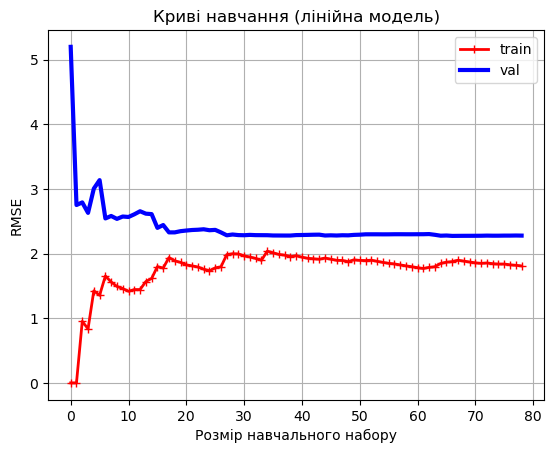

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Згенеруємо дані (варіант 4)
m = 100
X = 6 * np.random.rand(m, 1) - 5
y = 0.7 * X ** 2 + X + 3 + np.random.randn(m, 1)

# Функція побудови кривих навчання
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Розмір навчального набору")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.title("Криві навчання (лінійна модель)")
    plt.show()

# Лінійна модель
model = LinearRegression()
plot_learning_curves(model, X, y)


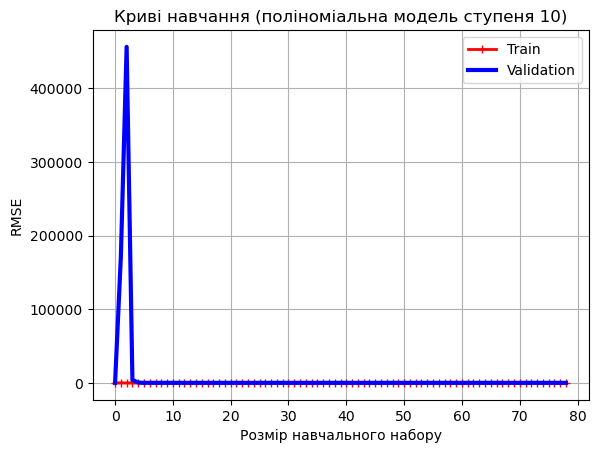

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Згенеруємо дані (варіант 4)
m = 100
X = 6 * np.random.rand(m, 1) - 5
y = 0.7 * X ** 2 + X + 3 + np.random.randn(m, 1)

# Функція побудови кривих навчання
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation")
    plt.xlabel("Розмір навчального набору")
    plt.ylabel("RMSE")
    plt.title("Криві навчання (поліноміальна модель ступеня 10)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Створимо поліноміальний пайплайн
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

# Побудова кривих
plot_learning_curves(polynomial_regression, X, y)